# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate?

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

Let's started

<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-10_10-32-20-69d03d986e3001cfb40c457eede13a58.jpg">


# Import Statements

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [2]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li>
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [3]:
# 1. Shape of df_tesla

df_tesla.shape

(124, 3)

In [4]:
print(f"Number of rows in tesla dataset - {df_tesla.shape[0]}")
print(f"Number of columns in tesla dataset - {df_tesla.shape[1]}")

Number of rows in tesla dataset - 124
Number of columns in tesla dataset - 3


In [5]:
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [6]:
# viewing the sample dataset
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [7]:
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [8]:
# describing the the data
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [9]:
# The periodicity of the time series
df_tesla.MONTH

0      2010-06-01
1      2010-07-01
2      2010-08-01
3      2010-09-01
4      2010-10-01
          ...    
119    2020-05-01
120    2020-06-01
121    2020-07-01
122    2020-08-01
123    2020-09-01
Name: MONTH, Length: 124, dtype: object

The periodicity of the data is **`monthly`**

In [10]:
df_tesla

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766000
1,2010-07-01,3,3.988000
2,2010-08-01,2,3.896000
3,2010-09-01,2,4.082000
4,2010-10-01,2,4.368000
...,...,...,...
119,2020-05-01,16,167.000000
120,2020-06-01,17,215.962006
121,2020-07-01,24,286.152008
122,2020-08-01,23,498.320007


### Unemployment Data

In [11]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [12]:
df_unemployment.shape

(181, 3)

In [13]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


> The unemployment DataFrame has 181 rows and 3 columns. As with Tesla, we have monthly data from 2004 onwards, organised in rows. Interestingly here, the largest value in the search column is 100.

### Bitcoin

In [14]:
print(df_btc_price.shape)
df_btc_price.head()

(2204, 3)


,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [15]:
print(df_btc_search.shape)
df_btc_search.head()

(73, 2)


,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [16]:
print(f'largest BTC News Search: {df_btc_search.BTC_NEWS_SEARCH.max()}')

largest BTC News Search: 100


### What do the Search Numbers mean?


We can see from our DataFrames that Google's search interest ranges between 0 and 100. But what does that mean? Google defines the values of search interest as:

> Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.

Basically, the actual search volume of a term is not publicly available. Google only offers a scaled number. Each data point is divided by the total searches of the geography and time range it represents to compare relative popularity.



For each word in your search, Google finds how much search volume in each region and time period your term had relative to all the searches in that region and time period. It then combines all of these measures into a single measure of popularity, and then it scales the values across your topics, so the largest measure is set to 100. In short: Google Trends doesn’t exactly tell you how many searches occurred for your topic, but it does give you a nice proxy.

Here are the Google Trends Search Parameters that I used to generate the .csv data:

* "Tesla", Worldwide, Web Search

* "Bitcoin", Worldwide, News Search

* "Unemployment Benefits", United States, Web Search

<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-10_10-37-10-b0e4a8a0fd6d583993afbb72388ac731.png">

# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [17]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [18]:
df_btc_price.isnull().sum()

DATE      0
CLOSE     1
VOLUME    1
dtype: int64

In [19]:
print(f'Missing values for BTC price?: {df_btc_price.isnull().values.any()}')

Missing values for BTC price?: True


In [20]:
print(f'Number of missing values: {df_btc_price.isnull().values.any().sum()}')

Number of missing values: 1


**Challenge**: Remove any missing values that you found.

In [21]:
# Checking the null value row

df_btc_price[df_btc_price.isnull().any(1)]

<ipython-input-21-b201f39353d4>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df_btc_price[df_btc_price.isnull().any(1)]


,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


In [22]:
# Dropping the Null value rows

df_btc_price.dropna(inplace=True)

# checking null value row again
df_btc_price[df_btc_price.isnull().any(1)]

<ipython-input-22-8567d8339d03>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df_btc_price[df_btc_price.isnull().any(1)]


,DATE,CLOSE,VOLUME


In [23]:
print(f'Number of missing values: {df_btc_price.isnull().values.any().sum()}')

Number of missing values: 0


### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [24]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [25]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [26]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [27]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [28]:
# Convering all the datasets date and month column to datetime from string

df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)

In [29]:
l = [df_tesla, df_unemployment, df_btc_price, df_btc_search]

for df in l:
    print(df.info())
    print("--------------------------------------------------")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   MONTH            124 non-null    datetime64[ns]
 1   TSLA_WEB_SEARCH  124 non-null    int64         
 2   TSLA_USD_CLOSE   124 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 3.0 KB
None
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   MONTH                   181 non-null    datetime64[ns]
 1   UE_BENEFITS_WEB_SEARCH  181 non-null    int64         
 2   UNRATE                  181 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 4.4 KB
None
----------------------------

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [30]:
df_btc_monthly = df_btc_price.resample("M", on="DATE").last()

In [34]:
print(df_btc_monthly.shape)
df_btc_monthly.head()

(73, 2)


,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


# Data Visualisation

### Notebook Formatting & Style Helpers

In [59]:
# Create locators for ticks on the time axis

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")

In [35]:
# Register date converters to avoid warning messages
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'.

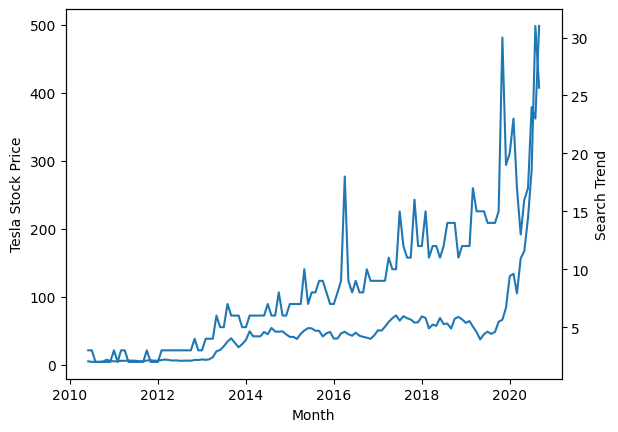

In [38]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(
    df_tesla.MONTH,
    df_tesla.TSLA_USD_CLOSE
    )
ax2.plot(
    df_tesla.MONTH,
    df_tesla.TSLA_WEB_SEARCH
)

ax1.set_xlabel("Month")
ax1.set_ylabel("Tesla Stock Price")
ax2.set_ylabel("Search Trend")
plt.show()

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price.
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

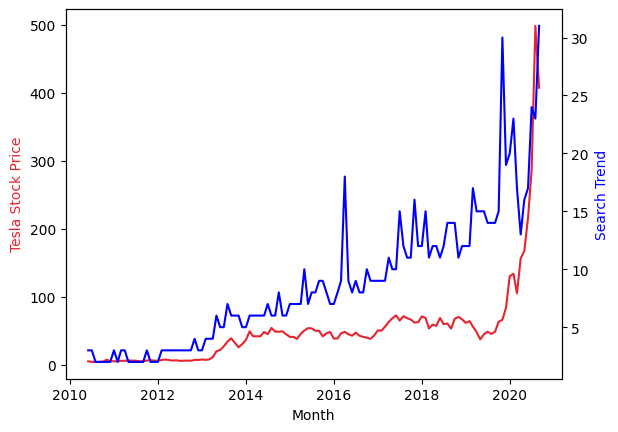

In [41]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(
    df_tesla.MONTH,
    df_tesla.TSLA_USD_CLOSE,
    color="#E6232E"
    )
ax2.plot(
    df_tesla.MONTH,
    df_tesla.TSLA_WEB_SEARCH,
    color="blue"
)

ax1.set_xlabel("Month")
ax1.set_ylabel("Tesla Stock Price",color="#E6232E")
ax2.set_ylabel("Search Trend", color="blue")
plt.show()

**Challenge**: Make the chart larger and easier to read.
1. Increase the figure size (e.g., to 14 by 8).
2. Increase the font sizes for the labels and the ticks on the x-axis to 14.
3. Rotate the text on the x-axis by 45 degrees.
4. Make the lines on the chart thicker.
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html).
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html).
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

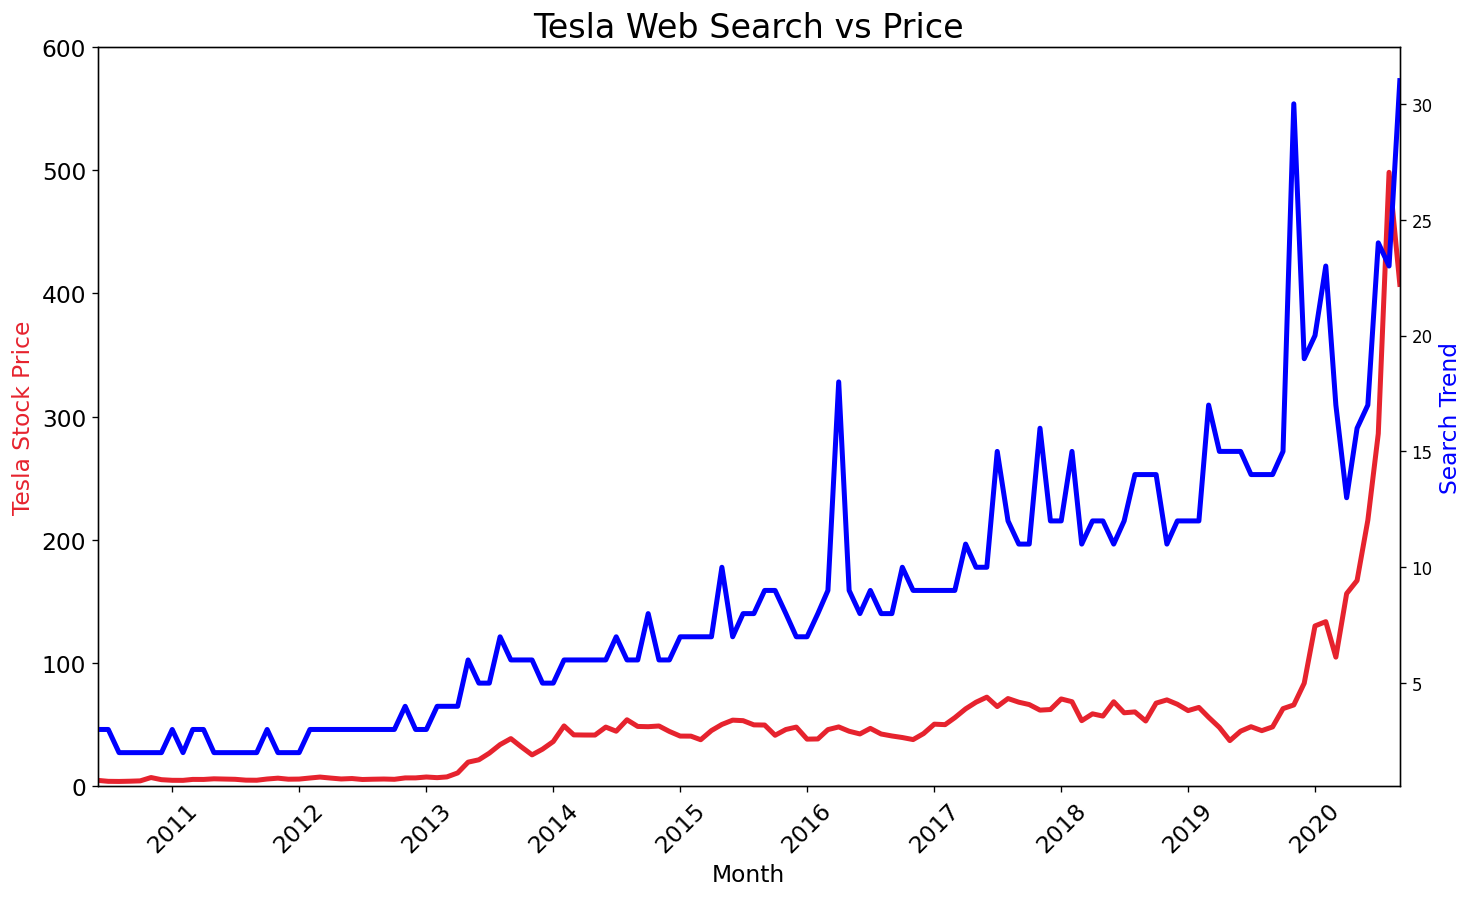

In [75]:
# Chart Formatting
plt.figure(figsize=(14,8),dpi=120)
plt.title("Tesla Web Search vs Price",fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

# Configuring for dual axis chart
ax1 = plt.gca()
ax2 = ax1.twinx()

# PLotting the chart for Tesla sctock price vs web search over time
ax1.plot(
    df_tesla.MONTH,
    df_tesla.TSLA_USD_CLOSE,
    color="#E6232E",
    linewidth=3
    )
ax2.plot(
    df_tesla.MONTH,
    df_tesla.TSLA_WEB_SEARCH,
    color="blue",
    linewidth=3
)

# Axis configuration
ax1.set_xlabel("Month",fontsize=14)
ax1.set_ylabel("Tesla Stock Price",color="#E6232E",fontsize=14)
plt.xticks(fontsize=14, rotation=45)
ax2.set_ylabel("Search Trend", color="blue",fontsize=14)

# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])
plt.show()

How to add tick formatting for dates on the x-axis.

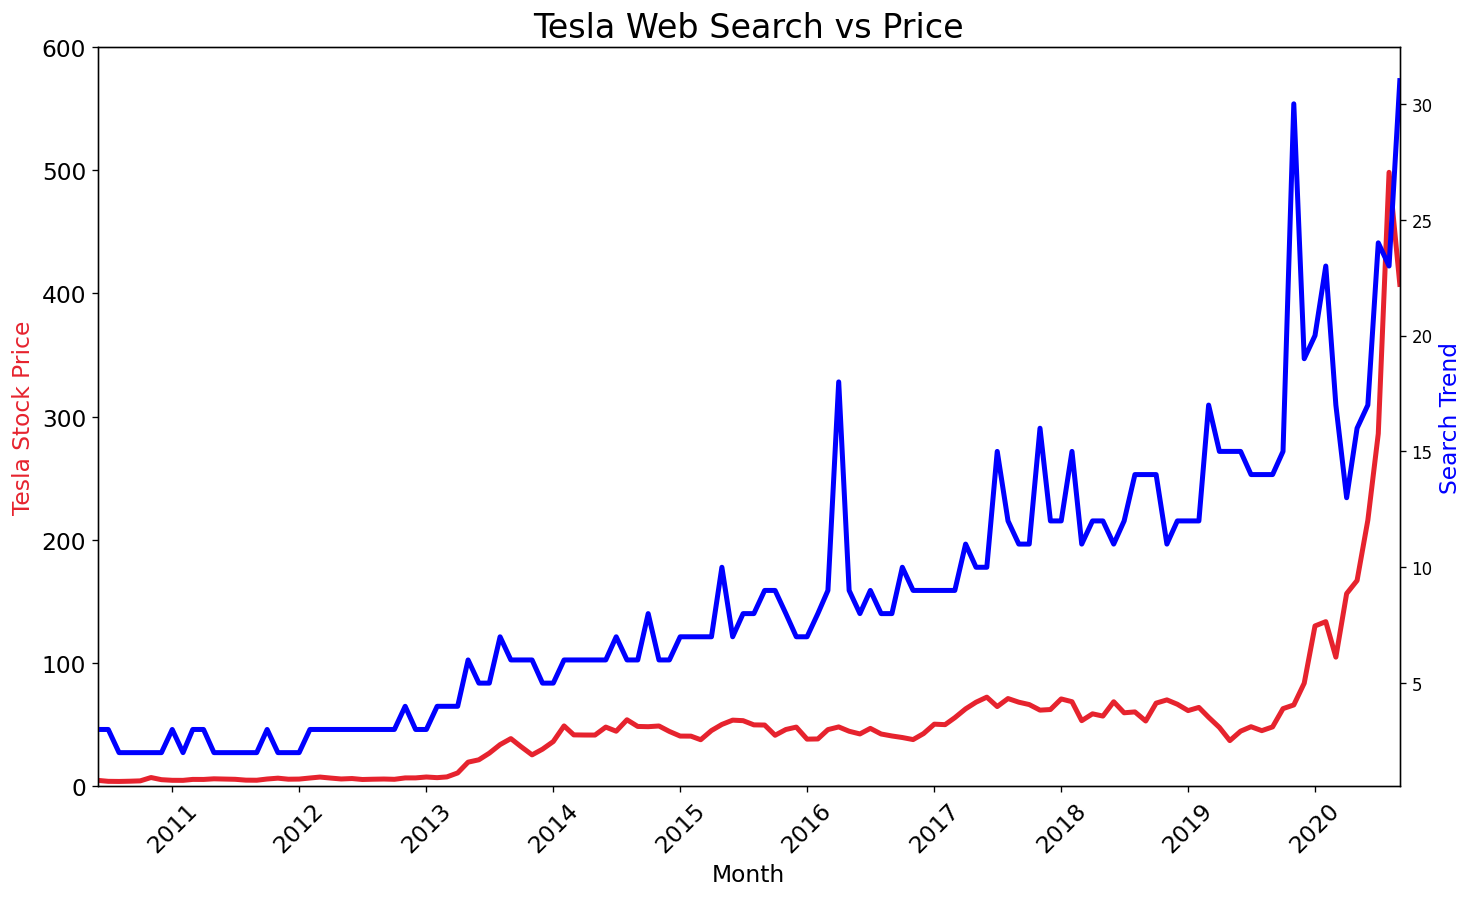

In [74]:
# Chart Formatting
plt.figure(figsize=(14,8),dpi=120)
plt.title("Tesla Web Search vs Price",fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

# Configuring for dual axis chart
ax1 = plt.gca()
ax2 = ax1.twinx()

# PLotting the chart for Tesla sctock price vs web search over time
ax1.plot(
    df_tesla.MONTH,
    df_tesla.TSLA_USD_CLOSE,
    color="#E6232E",
    linewidth=3
    )
ax2.plot(
    df_tesla.MONTH,
    df_tesla.TSLA_WEB_SEARCH,
    color="blue",
    linewidth=3
)

# Axis configuration
ax1.set_xlabel("Month",fontsize=14)
ax1.set_ylabel("Tesla Stock Price",color="#E6232E",fontsize=14)
plt.xticks(fontsize=14, rotation=45)
ax2.set_ylabel("Search Trend", color="blue",fontsize=14)

# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])
plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

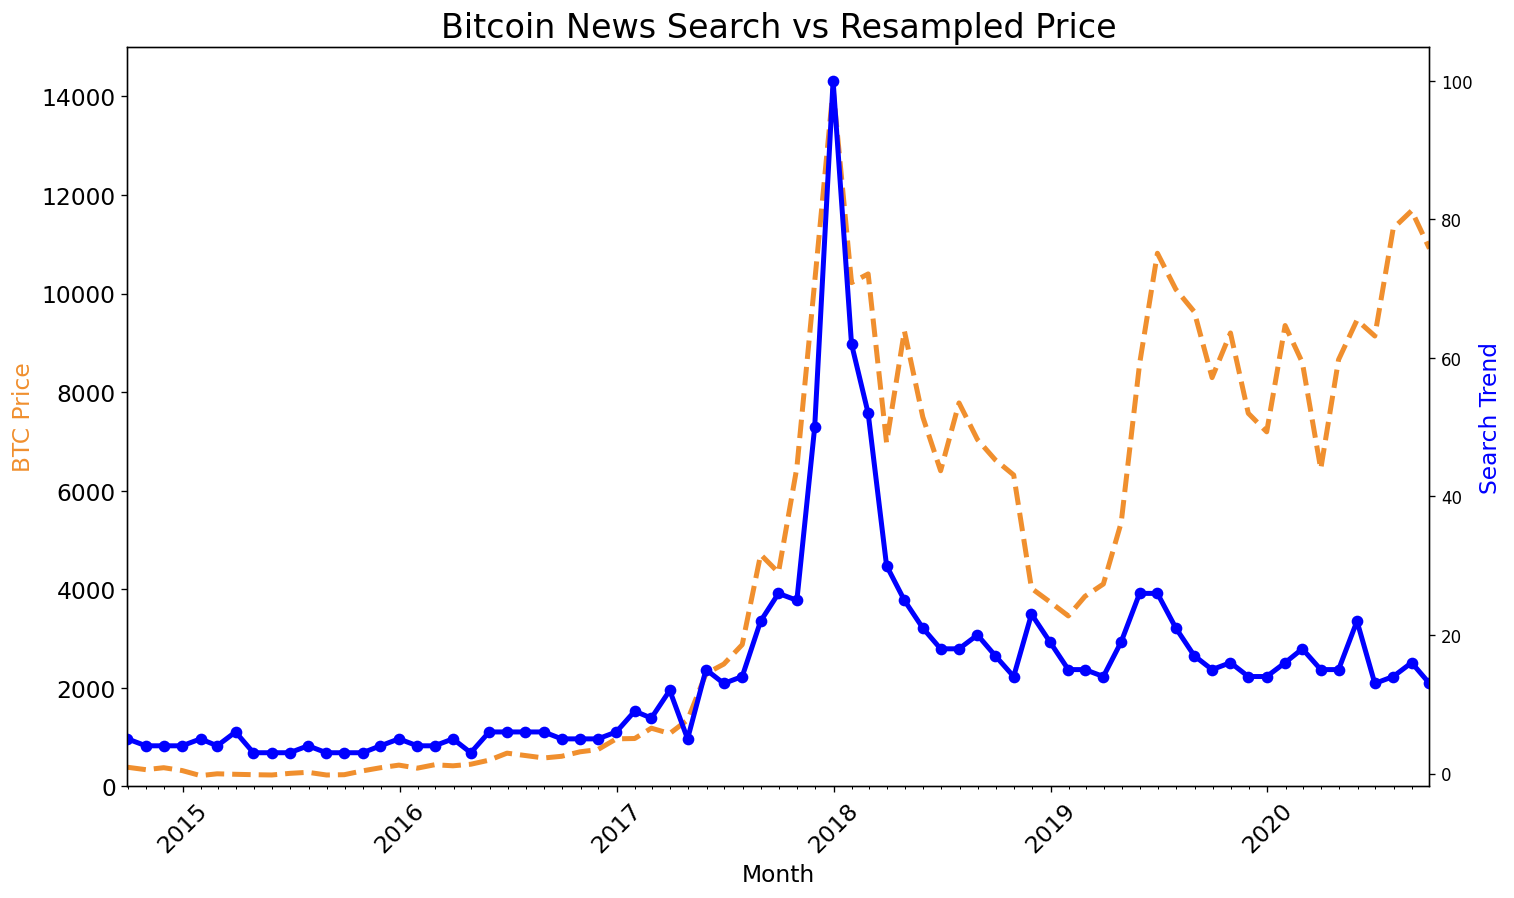

In [73]:
# Chart Formatting
plt.figure(figsize=(14,8),dpi=120)
plt.title("Bitcoin News Search vs Resampled Price",fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

# Configuring for dual axis chart
ax1 = plt.gca()
ax2 = ax1.twinx()

# PLotting the chart for Tesla sctock price vs web search over time
ax1.plot(
    df_btc_monthly.index,
    df_btc_monthly.CLOSE,
    color="#F08F2E",
    linewidth=3,
    linestyle="--"
    )
ax2.plot(
    df_btc_monthly.index,
    df_btc_search.BTC_NEWS_SEARCH,
    color="blue",
    linewidth=3,
    marker='o'
)

# Axis configuration
ax1.set_xlabel("Month",fontsize=14)
ax1.set_ylabel("BTC Price",color="#F08F2E",fontsize=14)
plt.xticks(fontsize=14, rotation=45)
ax2.set_ylabel("Search Trend", color="blue",fontsize=14)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 15000])
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])
plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate.
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br>
5. Can you discern any seasonality in the searches? Is there a pattern?

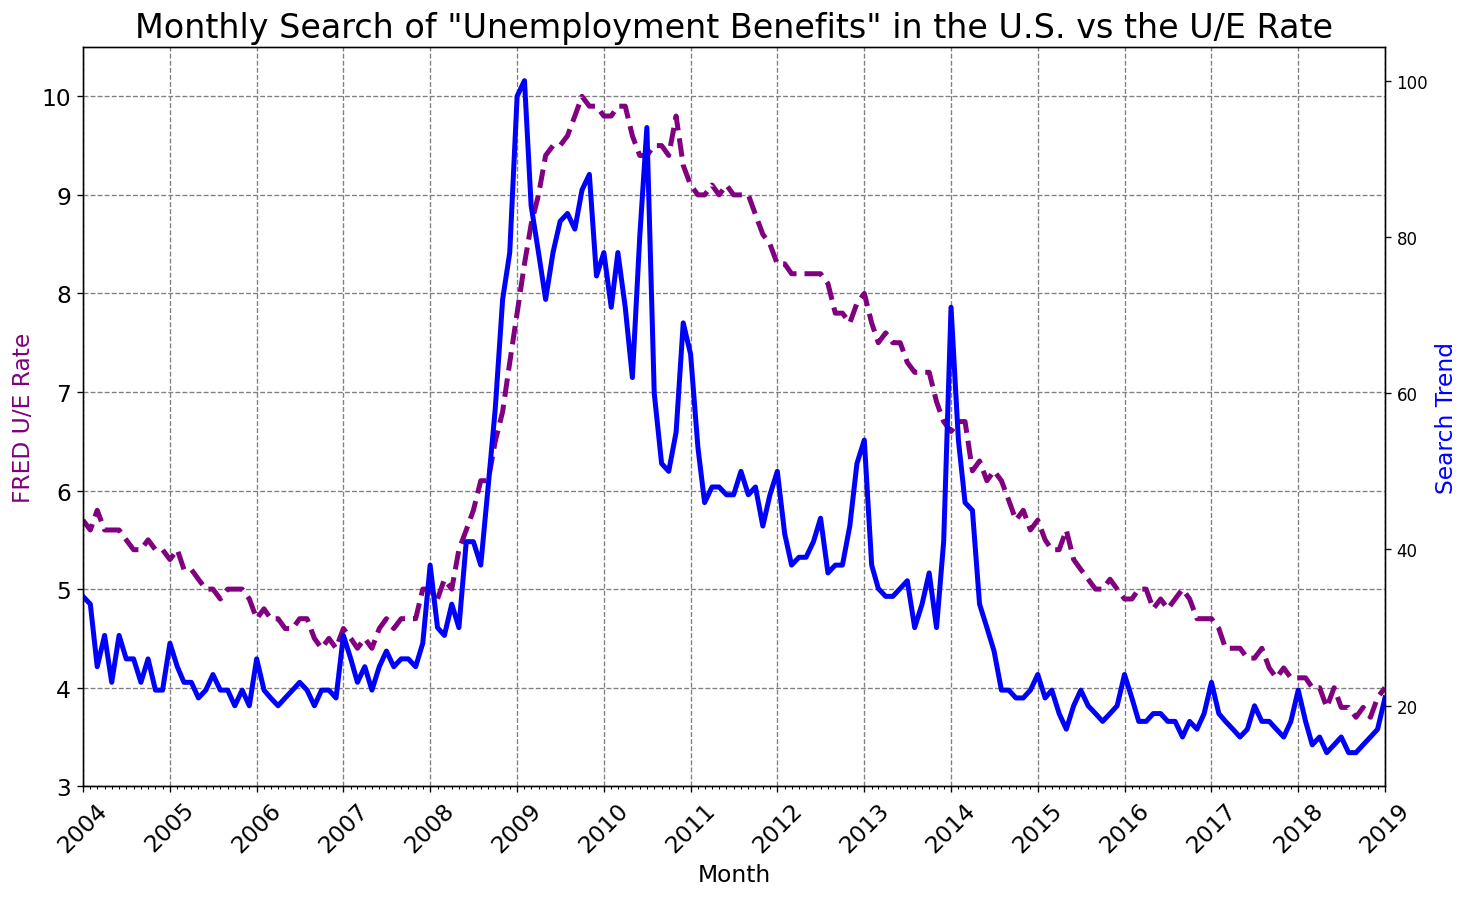

In [72]:
# Chart Formatting
plt.figure(figsize=(14,8),dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate',fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

# Configuring for dual axis chart
ax1 = plt.gca()
ax2 = ax1.twinx()

# PLotting the chart for Tesla sctock price vs web search over time
ax1.plot(
    df_unemployment.MONTH,
    df_unemployment.UNRATE,
    color="purple",
    linewidth=3,
    linestyle="--"
    )
ax2.plot(
    df_unemployment.MONTH,
    df_unemployment.UE_BENEFITS_WEB_SEARCH,
    color="blue",
    linewidth=3
)

# Axis configuration
ax1.set_xlabel("Month",fontsize=14)
ax1.set_ylabel("FRED U/E Rate",color="purple",fontsize=14)
ax1.grid(color='grey', linestyle='--')
ax2.set_ylabel("Search Trend", color="blue",fontsize=14)
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# Set the minimum and maximum values on the axes
ax1.set_ylim([3, 10.5])
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])
plt.show()

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


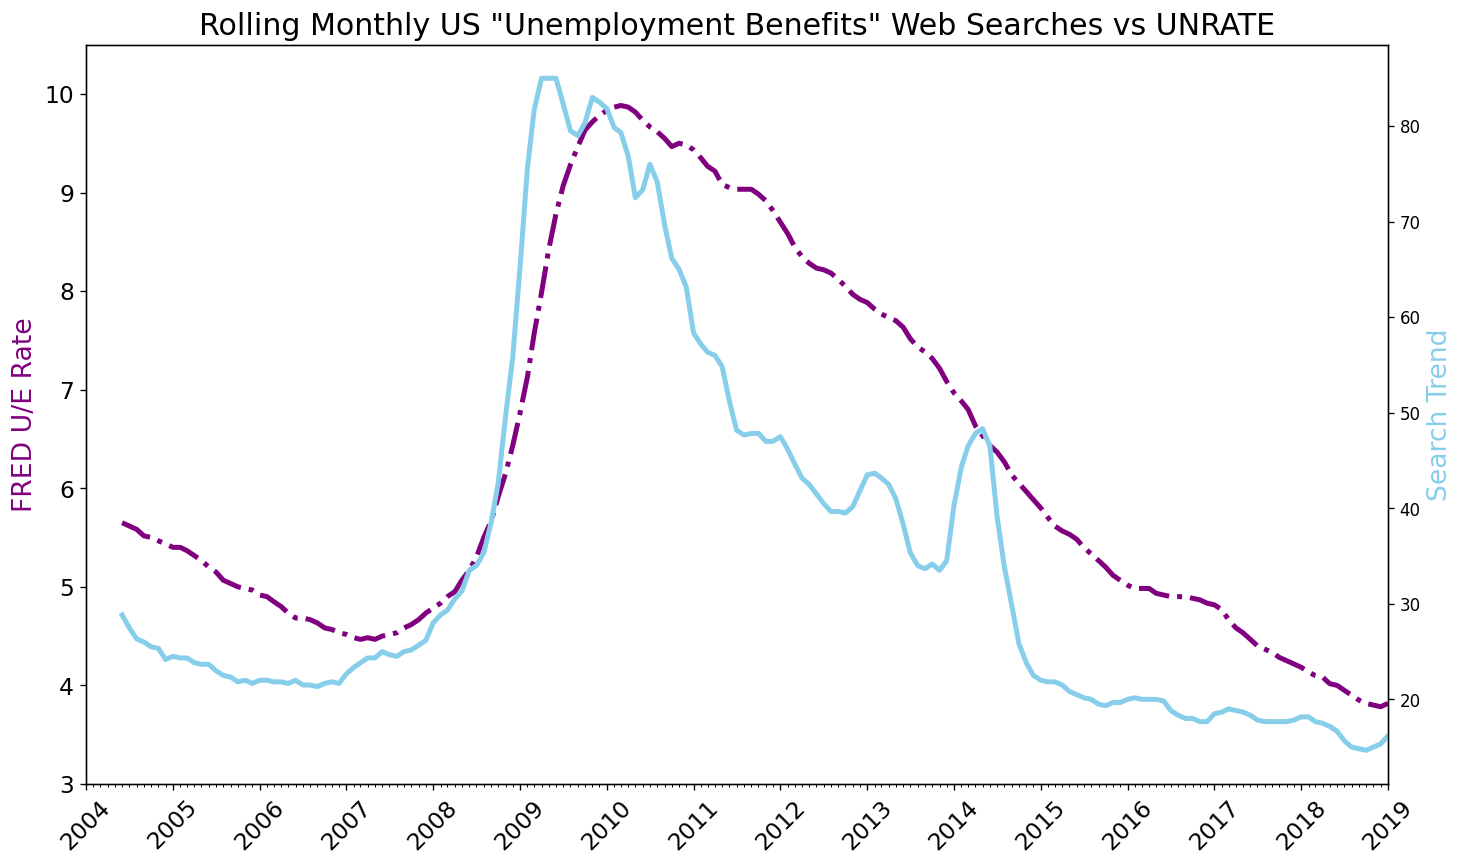

In [69]:
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

plt.figure(figsize=(14,8), dpi=120)
plt.title('Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)

ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH[0], df_unemployment.MONTH.max()])

# Calculate the rolling average over a 6 month window
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, 'purple', linewidth=3, linestyle='-.')
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)

plt.show()

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [70]:
df_ue_2020 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')
df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)

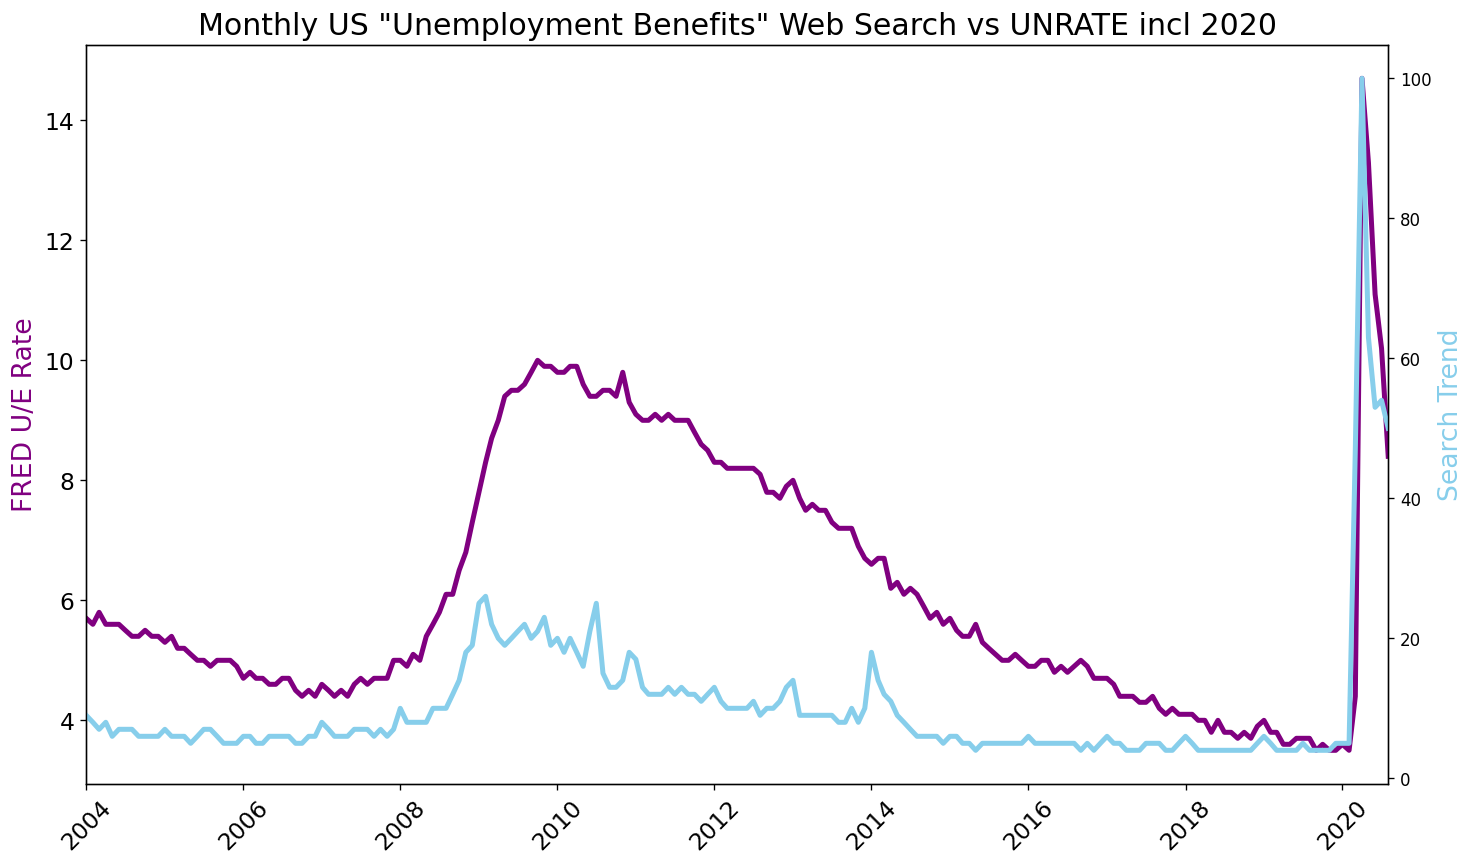

In [71]:
plt.figure(figsize=(14,8), dpi=120)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)

ax1.set_xlim([df_ue_2020.MONTH.min(), df_ue_2020.MONTH.max()])

ax1.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, 'purple', linewidth=3)
ax2.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)

plt.show()

### Learning Points & Summary
In this lesson we looked at how to:

* How to use `.describe()` to quickly see some descriptive statistics at a glance.

* How to use `.resample()` to make a time-series data comparable to another by changing the periodicity.

* How to work with `matplotlib.dates` Locators to better style a timeline (e.g., an axis on a chart).

* How to find the number of NaN values with `.isna().values.sum()`

* How to change the resolution of a chart using the figure's `dpi`

* How to create dashed `'--'` and dotted `'-.'` lines using linestyles

* How to use different kinds of markers (e.g., `'o'` or `'^'`) on charts.

* Fine-tuning the styling of Matplotlib charts by using limits, labels, `linewidth` and colours (both in the form of named colours and HEX codes).

* Using `.grid()` to help visually identify seasonality in a time series.

<img src="https://img-c.udemycdn.com/redactor/raw/2020-10-10_11-31-21-6f077e81c843cdfb085899620891eaf3.png">